In [13]:
#Import Liabries

import math
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [6]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=5d34ff4d7cea771cf2fe952a0c3809d65f3689bd2548512cb03505a83527edd9
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [7]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [8]:
#Get the data
df=pdr.get_data_yahoo('TSLA', data_source='yahoo', start='2012-01-01', end='2020-02-16')

#Show data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,5.788000,5.900000,5.530000,5.616000,5.616000,4640500
2012-01-04,5.642000,5.734000,5.500000,5.542000,5.542000,3150500
2012-01-05,5.552000,5.586000,5.370000,5.424000,5.424000,5027500
2012-01-06,5.440000,5.558000,5.282000,5.382000,5.382000,4931500
2012-01-09,5.400000,5.498000,5.224000,5.450000,5.450000,4485000
...,...,...,...,...,...,...
2020-02-10,160.000000,163.998001,150.479996,154.255997,154.255997,123446000
2020-02-11,153.757996,156.701996,151.600006,154.876007,154.876007,58487500
2020-02-12,155.574005,157.949997,152.673996,153.457993,153.457993,60112500


In [9]:
#no. of rows and columns
df.shape

(2043, 6)

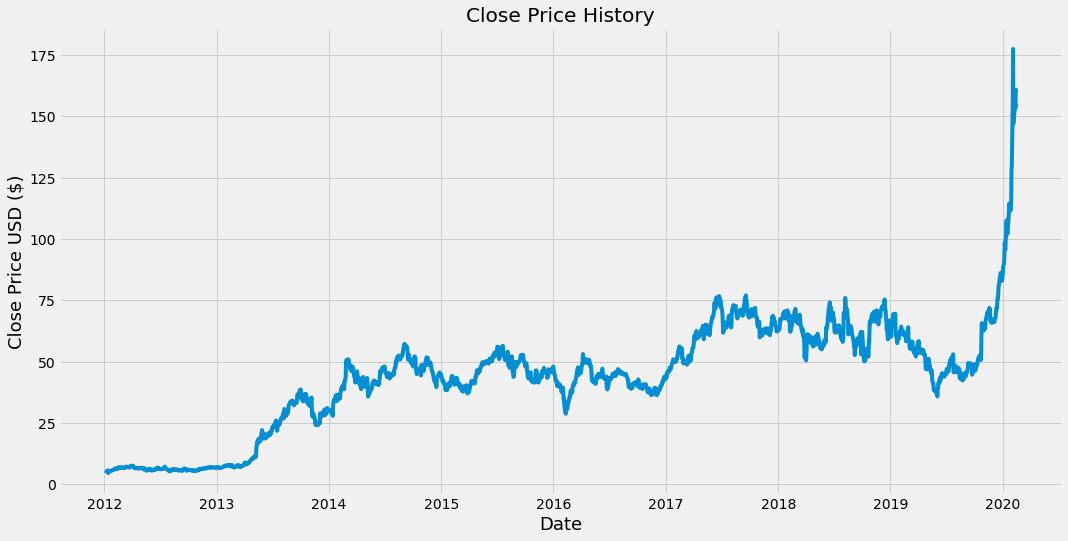

In [10]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [11]:
#Create a new dataframe with only the close column

data = df.filter(['Close'])

#Conver the dataframe to a numpy array

dataset= data.values

#Get the number of rows to train the model on

trainig_data_len = math.ceil(len(dataset) * .8)

trainig_data_len


1635

In [12]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scale_data = scaler.fit_transform(dataset)


scale_data

array([[0.00612077],
       [0.00569266],
       [0.00501001],
       ...,
       [0.86142056],
       [0.90389578],
       [0.89930227]])

In [ ]:
#Create the training data set
#Create the Scale training data set
train_data = scale_data[0:trainig_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])   #Contain 0 - 59 data
  y_train.append(train_data[i, 0])        #Contain 60 - remaining
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.00612077, 0.00569266, 0.00501001, 0.00476703, 0.00516042,
       0.00558853, 0.00629433, 0.00631747, 0.        , 0.00440835,
       0.00465132, 0.00459347, 0.00440835, 0.00460504, 0.00535712,
       0.0059935 , 0.00711583, 0.00756708, 0.00784477, 0.00726625,
       0.00785634, 0.00863156, 0.0096729 , 0.01042498, 0.01019357,
       0.0105754 , 0.01132748, 0.00961505, 0.0100663 , 0.01201013,
       0.01250766, 0.01317875, 0.01409282, 0.01354901, 0.01322503,
       0.01358372, 0.01268122, 0.01253081, 0.01275064, 0.01228783,
       0.01344487, 0.01301677, 0.01270436, 0.01194071, 0.01195228,
       0.01189443, 0.0138267 , 0.01529615, 0.01538871, 0.01446307,
       0.01412753, 0.01449778, 0.01410439, 0.01408125, 0.01430109,
       0.0134333 , 0.01306305, 0.01690444, 0.01752924, 0.01742511])]
[0.016823446091615766]

[array([0.00612077, 0.00569266, 0.00501001, 0.00476703, 0.00516042,
       0.00558853, 0.00629433, 0.00631747, 0.        , 0.00440835,
       0.00465132, 0.00459347, 0.0

In [ ]:
#Convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1575, 60, 1)

In [ ]:
#Build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))     #50 Neuron LSTM Layer
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))                                                             #Dense Layer 25 Neuron
model.add(Dense(1))

In [ ]:
#Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')  #Loss function used mean squared error to eveluate how the model perform in training

In [ ]:
#Train the model

model.fit(x_train, y_train, batch_size=1, epochs=5)   #hyperperameter: batch size and epochs
                                                      #Used epochs=5 because it gives me beter prediction

Epoch 1/5
1575/1575 [==============================] - 38s 23ms/step - loss: 0.0015
Epoch 2/5
1575/1575 [==============================] - 35s 22ms/step - loss: 2.7321e-04
Epoch 3/5
1575/1575 [==============================] - 35s 22ms/step - loss: 1.7575e-04
Epoch 4/5
1575/1575 [==============================] - 35s 22ms/step - loss: 1.1964e-04
Epoch 5/5
1575/1575 [==============================] - 35s 22ms/step - loss: 9.4930e-05


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scale_data[trainig_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[trainig_data_len:, :] #include first 60 values
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])  #Used append parameter to add 60 values in the list

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)  #Convert to use LSTM model

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))   # rows(0), columns(1) and features(1)

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.8865603839649874

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


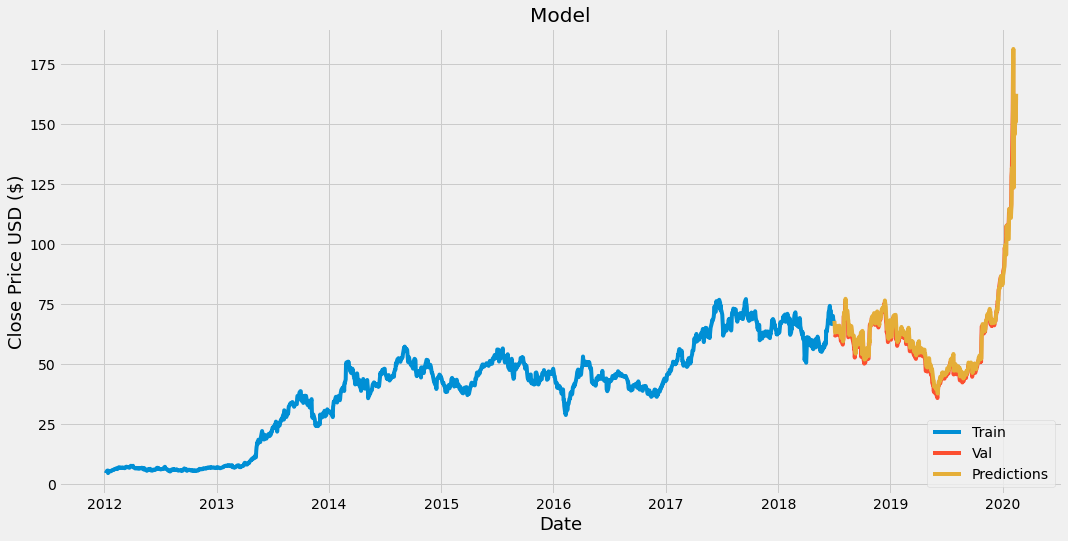

In [ ]:
#Plot the data
train = data[:trainig_data_len]
valid = data[trainig_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-07-03,62.172001,67.898094
2018-07-05,61.832001,63.051445
2018-07-06,61.779999,63.267609
2018-07-09,63.702000,63.287052
2018-07-10,64.494003,65.256760
...,...,...
2020-02-10,154.255997,145.636520
2020-02-11,154.876007,155.526123
2020-02-12,153.457993,152.081879


In [ ]:
#Get the quote
Tesla_quote = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2020-02-16')
new_df = Tesla_quote.filter(['Close'])
#Get the Last 60 day closing price values and conver the dataframe to any array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[155.40762]]


In [ ]:
#Get the quote
Tesla_quote2 = web.DataReader('TSLA', data_source='yahoo', start='2020-02-18', end='2020-02-18')
print(Tesla_quote2['Close'])

Date
2020-02-18    171.679993
Name: Close, dtype: float64
